<a href="https://colab.research.google.com/github/fauk74/Machine-Learning/blob/main/tensorflow_transfer_learning_part_2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Sep 15 03:14:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-09-15 03:14:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-15 03:14:37 (81.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback , plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-09-15 03:14:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 172.217.219.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   124MB/s    in 1.3s    

2021-09-15 03:14:48 (124 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=BATCH_SIZE,
                                                                          )
test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=BATCH_SIZE,
                                                                          )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
#Check out the class names of dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[ 76.92857    72.92857    69.92857  ]
   [ 78.26021    74.26021    71.26021  ]
   [ 81.5        77.5        74.5      ]
   ...
   [ 69.64286    61.642857   58.642857 ]
   [ 68.61734    60.617344   57.617344 ]
   [ 67.0561     59.0561     56.0561   ]]

  [[ 85.78571    81.78571    78.78571  ]
   [ 85.78571    81.78571    78.78571  ]
   [ 87.07143    83.07143    80.07143  ]
   ...
   [ 72.92857    64.92857    61.928574 ]
   [ 71.92857    63.928574   60.928574 ]
   [ 70.92857    62.928574   59.928574 ]]

  [[ 89.21429    85.21429    82.21429  ]
   [ 89.21429    85.21429    82.21429  ]
   [ 90.26021    86.26021    83.26021  ]
   ...
   [ 73.16837    65.16837    62.168373 ]
   [ 73.21429    65.21429    62.214287 ]
   [ 72.85711    64.85711    61.85711  ]]

  ...

  [[254.        254.        254.       ]
   [254.        254.        254.       ]
   [254.        254.        254.       ]
   ...
   [254.0664    254.66328   250.54085  ]
   [241.70882   242.92308   237.92308  ]
   [2

# Functional API


In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable=False

inputs= tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

#x=tf.keras.layers.experimental.preprocessing.Rescaling(1./255) (inputs)
x=base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2d: {x.shape}")
outputs=tf.keras.layers.Dense(10, activation="softmax", name ="output_layer")(x)

model_0=tf.keras.Model(inputs, outputs)


model_0.compile( loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_model_0=model_0.fit(train_data_10_percent,
                            epochs=5,
                            steps_per_epoch=len(train_data_10_percent),
                            validation_data=test_data_10_percent,
                            validation_steps=len(test_data_10_percent),
                            callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                            experiment_name="EfficientNetB0")])


16719872/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2d: (None, 1280)
Saving TensorBoard log files to: tensorflow_hub/EfficientNetB0/20210915-031520
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 50s 728ms/step - loss: 1.8943 - accuracy: 0.3933 - val_loss: 1.3696 - val_accuracy: 0.6872
Epoch 2/5
24/24 [==============================] - 14s 593ms/step - loss: 1.1304 - accuracy: 0.7600 - val_loss: 0.9319 - val_accuracy: 0.7992
Epoch 3/5
24/24 [==============================] - 14s 591ms/step - loss: 0.8369 - accuracy: 0.8013 - val_loss: 0.7602 - val_accuracy: 0.8208
Epoch 4/5
24/24 [==============================] - 14s 588ms/step - loss: 0.6741 - accuracy: 0.8427 - val_loss: 0.6687 - val_accuracy: 0.8296
Epoch 5/5
24/24 [==============================] - 14s 586ms/step - loss: 0.5876 - accuracy: 0.8573 - val_loss: 0.6132 - val_accuracy: 0.8384


In [ ]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 11s 129ms/step - loss: 0.6118 - accuracy: 0.8332


[0.6117599606513977, 0.8331999778747559]

In [ ]:
for layer_number, layer in enumerate (base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


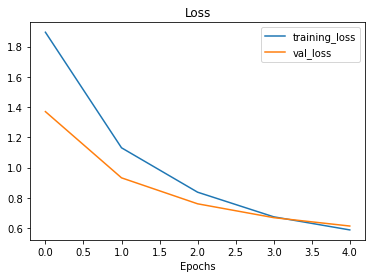

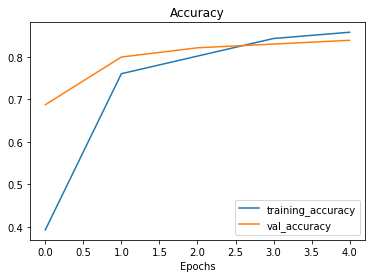

In [ ]:
plot_loss_curves(history_model_0)

In [ ]:
## define the inpout shape

In [ ]:
input_shape=(1,4,4,3)

In [ ]:
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(input_tensor)

tf.Tensor(
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]], shape=(1, 4, 4, 3), dtype=float32)


In [ ]:
global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average tensor:\n {global_average_pooled_tensor}")

2D global average tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]


In [ ]:
print(f"Input tensor shape:\n {input_tensor.shape}")
print(f"Global average shape:\n {global_average_pooled_tensor.shape}")

Input tensor shape:
 (1, 4, 4, 3)
Global average shape:
 (1, 3)


In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
global_max_pooled_tensor=tf.keras.layers.GlobalMaxPooling2D()(input_tensor)

In [ ]:
print(f"2D global average tensor:\n {global_max_pooled_tensor}")

2D global average tensor:
 [[0.9058464 1.1603122 1.6994323]]


In [ ]:
tf.reduce_max(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

# 10 food 1 %

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip


--2021-09-15 03:18:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  75.1MB/s    in 1.7s    

2021-09-15 03:18:25 (75.1 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data ("10_food_classes_1_percent.zip")

In [ ]:
train_dir_1_percent="10_food_classes_1_percent/train"
test_dir_1_percent="10_food_classes_1_percent/test"
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There a

In [ ]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                         label_mode="categorical",
                                                                         image_size=IMG_SIZE,
                                                                         batch_size=BATCH_SIZE)
test_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                         label_mode="categorical",
                                                                         image_size=IMG_SIZE,
                                                                         batch_size=BATCH_SIZE)
                                                                         


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [ ]:
data_augmentation=keras.Sequential([ 
                                    preprocessing.RandomFlip("horizontal"),
                                    preprocessing.RandomRotation(0.2),
                                    preprocessing.RandomZoom(0.2),
                                    preprocessing.RandomHeight(0.2),
                                    preprocessing.RandomWidth(0.2),
                                    ], name="data_augmentation" 
)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import random


                                      

In [ ]:
img=mpimg.imread(random_image_path)
print(random_image_path)
print(random_image)

NameError: ignored

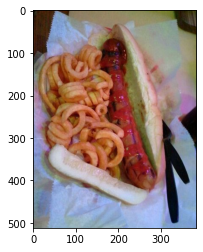

In [ ]:
plt.imshow(img)

10_food_classes_1_percent/train/ramen/1284262.jpg
1284262.jpg


Text(0.5, 1.0, 'Augmented image from class ramen')

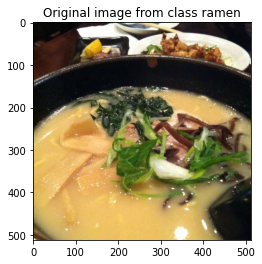

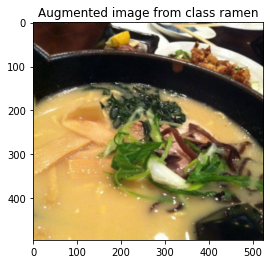

In [ ]:
target_class=random.choice(train_data_1_percent.class_names)
target_dir="10_food_classes_1_percent/train/"   + target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image



img=mpimg.imread(random_image_path)
print(random_image_path)
print(random_image)
plt.title(f"Original image from class {target_class}")
plt.imshow(img)


augmented_img=data_augmentation(tf.expand_dims(img,axis=0))/255
plt.figure()
plt.imshow(tf.squeeze(augmented_img))
plt.title(f"Augmented image from class {target_class}")

# Model 1 1% of the data

In [ ]:
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#create input layer
inputs=layers.Input(shape=input_shape, name="input_layer")
x=data_augmentation(inputs)

#give base model thei nputs after aug and do not train it
x=base_model(x, training=False)

x=layers.GlobalAveragePooling2D()(x)

outputs=layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1=keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1_percent=model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data_1_percent,
                              validation_steps=int(0.25*len(test_data_1_percent)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="1_percent_data_aug")])



Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20210913-044634
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 41s 4s/step - loss: 2.4609 - accuracy: 0.0857 - val_loss: 2.3608 - val_accuracy: 0.0872
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1926 - accuracy: 0.2000 - val_loss: 2.2325 - val_accuracy: 0.1612
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.9727 - accuracy: 0.4286 - val_loss: 2.1275 - val_accuracy: 0.2451
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.8214 - accuracy: 0.5000 - val_loss: 2.0278 - val_accuracy: 0.3125
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6712 - accuracy: 0.5857 - val_loss: 1.9308 - val_accuracy: 0.3668


In [ ]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_1.evaluate(test_data_1_percent)

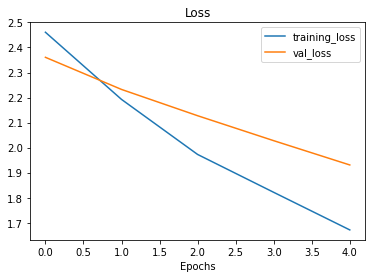

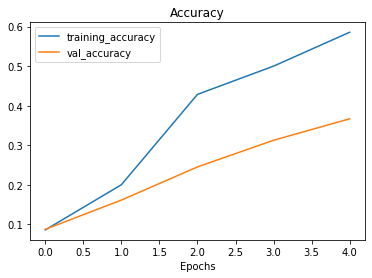

In [ ]:
#How do the model with 1% and data augm ? 
plot_loss_curves(history_1_percent)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation=Sequential([
                              preprocessing.RandomFlip("horizontal"),
                              preprocessing.RandomHeight(0.2),
                              preprocessing.RandomHeight(0.2),
                              preprocessing.RandomWidth(0.2),
                              preprocessing.RandomZoom(0.2),
                              preprocessing.RandomRotation(0.2),


], name="Data_Augmentation")
input_shape=(224,224,3)

#create frozen base model (backbone)

base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=layers.Input(shape=input_shape, name="input_layer")
x=data_augmentation(inputs)
x=base_model(x, training=False)
x=layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs=layers.Dense(10,activation="softmax", name="output_layer")(x)
model_2=tf.keras.Model(inputs,outputs)

#Compile

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
Data_Augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_2D (G (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


# Model CheckPoint

In [ ]:
check_point_path="ten_percent_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       save_freq="epoch",
                                                       verbose=1)

In [ ]:
initial_epochs=5
history_10_percent_data_aug=model_2.fit(train_data_10_percent,
                              epochs=initial_epochs,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data_10_percent,
                              validation_steps=int(0.25*len(test_data_10_percent)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="10_percent_data_aug"),
                                         checkpoint_callback])



Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20210915-033508
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 14s 584ms/step - loss: 0.4171 - accuracy: 0.8973 - val_loss: 0.5331 - val_accuracy: 0.8257

Epoch 00001: saving model to ten_percent_checkpoints_weights/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 15s 616ms/step - loss: 0.4012 - accuracy: 0.9173 - val_loss: 0.5209 - val_accuracy: 0.8322

Epoch 00002: saving model to ten_percent_checkpoints_weights/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 14s 553ms/step - loss: 0.4085 - accuracy: 0.9027 - val_loss: 0.5453 - val_accuracy: 0.8207

Epoch 00003: saving model to ten_percent_checkpoints_weights/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 15s 607ms/step - loss: 0.4035 - accuracy: 0.8907 - val_loss: 0.5280 - val_accuracy: 0.8158

Epoch 00004: saving model to ten_percent_checkpoints_weights/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 13s 535ms/step - loss: 0.3505 - accuracy: 0.9240 - val_loss: 0.5206 - val_accur

In [ ]:
results_10_percent_data_aug=model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 11s 133ms/step - loss: 0.5273 - accuracy: 0.8396


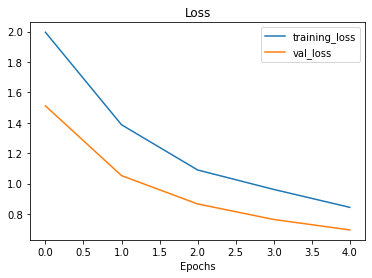

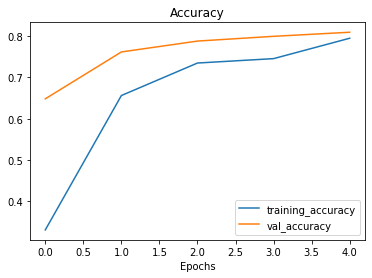

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
model_2.load_weights(check_point_path)

In [ ]:
loaded_weights_model_results=model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 11s 132ms/step - loss: 0.4956 - accuracy: 0.8460


In [ ]:
loaded_weights_model_results


[0.4955819249153137, 0.8460000157356262]

In [ ]:
results_10_percent_data_aug

[0.5272907018661499, 0.8396000266075134]

In [ ]:
import numpy as np
np.isclose(np.array(loaded_weights_model_results), np.array(results_10_percent_data_aug))

array([ True,  True])

In [ ]:
#Ho fatto girare il modello due volte, si vede che i risultati sono nettamente diversi 
#in sostanza il checkpoint  viene sovrascritto  ma non viene azzerato!! E' come se andasse a modificare 
# e poi riparte da la . Per cui se faccio girare due volte , ovviamente 
# il modello performa meglio 
# se voglio ripartire, devo cancellare i check point

# Model 3 Fine Tuning

In [ ]:
#model 3 is a modified version of model _2 
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f7f70489990> True
<keras.engine.sequential.Sequential object at 0x7f7fcabe7110> True
<keras.engine.functional.Functional object at 0x7f7fca81d7d0> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f7fca8c6bd0> True
<keras.layers.core.Dense object at 0x7f7fca8f88d0> True


In [ ]:
for i, layer  in enumerate (model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
#how many trainables?

print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
#Set last 10 mlayers trainable = True

base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

In [ ]:
model_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.0001), # when fine tuning, you lower the learning by 10x 
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#UMLFit 

In [ ]:
for i,layer in enumerate (model_2.layers[2].layers):
  print(i, layer.name, layer. trainable )

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
print(len(model_2.trainable_variables))

12


In [ ]:
model_2.trainable_variables[1]

<tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
array([-0.10886215, -0.13624744, -0.15257476,  0.14799541, -0.08512902,
       -0.12059905, -0.08779966, -0.08187538, -0.06925284, -0.12518929,
       -0.0819265 , -0.1259736 , -0.09993652, -0.10109923, -0.13398036,
       -0.09867296, -0.09382621, -0.11011569, -0.1063069 , -0.09003814,
       -0.04766154, -0.06743164, -0.13778378, -0.10579358, -0.10130141,
       -0.13948615,  0.13246794, -0.03255463, -0.11809722, -0.04813838,
       -0.13148174, -0.05429332, -0.0448516 , -0.11129897, -0.08523702,
       -0.13361962, -0.07146074, -0.13821687, -0.0614575 , -0.02393492,
       -0.08265438, -0.13204956, -0.10251977, -0.12446474, -0.1350065 ,
       -0.06927117, -0.07627591, -0.08064308], dtype=float32)>

In [ ]:
fine_tune_epochs=initial_epochs+5

history_fine_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                             epochs=fine_tune_epochs,
                                             validation_data=test_data_10_percent,
                                             validation_steps=int(0.25*len(test_data_10_percent)),
                                             initial_epoch=history_10_percent_data_aug.epoch[-1], # start training from last epoch
                                             callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                   experiment_name="10_percent_fine_tuining_10_percent_aug"
                                                                                  
                                             )])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuining_10_percent_aug/20210915-040505
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 26s 749ms/step - loss: 0.3532 - accuracy: 0.9027 - val_loss: 0.5130 - val_accuracy: 0.8339
Epoch 6/10
24/24 [==============================] - 13s 534ms/step - loss: 0.3113 - accuracy: 0.9093 - val_loss: 0.5651 - val_accuracy: 0.8076
Epoch 7/10
24/24 [==============================] - 13s 521ms/step - loss: 0.2748 - accuracy: 0.9160 - val_loss: 0.5525 - val_accuracy: 0.8158
Epoch 8/10
24/24 [==============================] - 15s 634ms/step - loss: 0.2420 - accuracy: 0.9240 - val_loss: 0.5063 - val_accuracy: 0.8207
Epoch 9/10
24/24 [==============================] - 12s 464ms/step - loss: 0.2409 - accuracy: 0.9200 - val_loss: 0.5703 - val_accuracy: 0.8158
Epoch 10/10
24/24 [==============================] - 13s 544ms/step - loss: 0.2131 - accuracy: 0.9360 - val_loss: 0.5378 - val_accuracy: 0.8207


In [ ]:
results_fine_tune_10_percent=model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 11s 132ms/step - loss: 0.4922 - accuracy: 0.8464


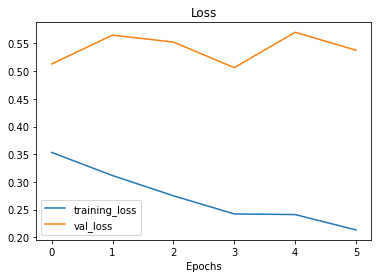

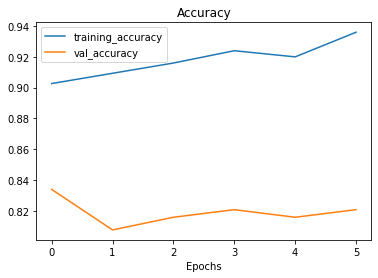

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
def compare_histories(original_history, new_history, initial_epoch=5):
  acc=original_history.history["accuracy"]
  loss=original_history.history["loss"]

  val_acc=original_history.history["val_accuracy"]
  val_loss=original_history.history["val_loss"]

  total_acc=acc+new_history.history["accuracy"]
  total_loss=loss+new_history.history["loss"]
  total_val_acc=val_acc+new_history.history["val_accuracy"]
  total_val_loss=val_loss+new_history.history["val_loss"]

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training_accuracy")
  plt.plot(total_val_acc, label="Val_accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")


  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training_loss")
  plt.plot(total_val_loss, label="Val_loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")




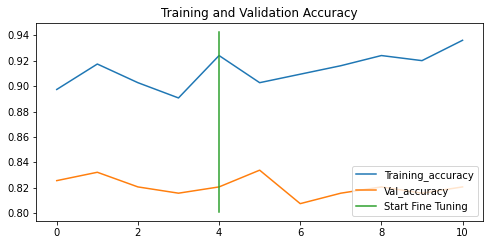

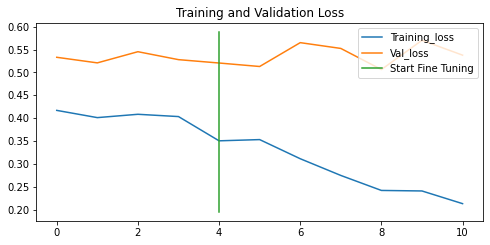

In [ ]:

compare_histories(history_10_percent_data_aug,
                  history_fine_10_percent_data_aug, 
                  initial_epoch=5)

In [ ]:
#Model 4 : Fine Tuning with 100% of data


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-09-15 04:47:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   153MB/s    in 3.2s    

2021-09-15 04:47:24 (153 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
unzip_data("10_food_classes_all_data.zip")

In [ ]:
train_dir_all_data="10_food_classes_all_data/train/"
test_data="10_food_classes_all_data/test/"
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [ ]:
#Setp data inputs
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_classes_full=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=BATCH_SIZE,
                                                                          )
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=BATCH_SIZE,
                                                                          )


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.4922 - accuracy: 0.8464


[0.49216362833976746, 0.8464000225067139]

In [ ]:
results_fine_tune_10_percent

[0.49216362833976746, 0.8464000225067139]

In [ ]:
#Load Model from checkpoint
model_2.load_weights(check_point_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.4956 - accuracy: 0.8460


[0.49558189511299133, 0.8460000157356262]